## Group
Emilio Sagre,
Donna Santos,
Mo Akmad,
Steven Wang,
Jombee Tupas

### Gensim

## Getting Started

In [1]:
!python -m pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 2.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
!pip install -q wordcloud
import wordcloud 

import nltk  
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
import numpy as np
import pandas as pd ## For data handling
import re ## For preprocessing
import string
import matplotlib.pyplot as plt

In [4]:
import gensim
import multiprocessing

In [5]:
from gensim.models import Word2Vec

In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import sys
def replace_none(X):
    if X == '':
        X = np.nan
    return X

In [26]:
# def build_model(max_epochs, vec_size, alpha, tagged_data):
    
#     model = Doc2Vec(vector_size=vec_size,
#                alpha=alpha,
#                min_alpha=0.00025,
#                min_count=1,
#                dm=1)
    
#     model.build_vocab(tag_data)
      
#     for epoch in range(max_epochs):
#         print(f"Iteration {epoch}")
#         model.train(tag_data,
#                    total_examples=model.corpus_count,
#                    epochs=model.epochs)

#         model.alpha -= 0.0002

#         model.min_alpha = model.alpha
    
#     model.save("spam_w2v.model")
#     print("Model Saved")
#     return model

In [28]:
def build_model(max_epochs, vec_size, alpha, tagged_data):
    
    model = Doc2Vec(vector_size=vec_size,
               alpha=alpha,
               min_alpha=0.00025,
               min_count=1,
               dm=1)
    
    model.build_vocab(tagged_data)
      
    for epoch in range(max_epochs):
        print(f"Iteration {epoch}")
        model.train(tagged_data,
                   total_examples=model.corpus_count,
                   epochs=model.epochs)

        model.alpha -= 0.0002

        model.min_alpha = model.alpha
    
    model.save("spam_w2v.model")
    print("Model Saved")
    return model

## Preprocessing

In [9]:
df = pd.read_csv('spamhamtrain.csv', encoding='latin-1')
df.columns = ["target", "message"]
df.shape

(4457, 2)

In [10]:
df.head()

,target,message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...


In [11]:
df.isnull().sum()

target     0
message    0
dtype: int64

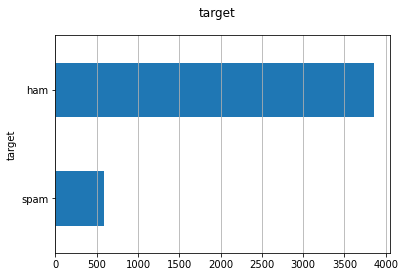

In [12]:
fig, ax = plt.subplots()
fig.suptitle("target", fontsize=12)
df["target"].reset_index().groupby("target").count().sort_values(by= "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show() 

### data is not balanced

## Cleaning

In [13]:
#example of stopwords per nltk corpus
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
    #characters and then strip
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [15]:
#remove stopwords and other unnecessary words
df["message_clean"] = df["message"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df.head()

,target,message,message_clean
0,ham,"K I'm leaving soon, be there a little after 9",k im leaving soon little 9
1,ham,No. Yes please. Been swimming?,yes please swimming
2,ham,It took Mr owl 3 licks,took mr owl 3 lick
3,ham,Its going good...no problem..but still need li...,going goodno problembut still need little expe...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,k yan jiu liao sat go 4 bugis vill one frm 10 ...


In [16]:
data_cleaned = list(df['message_clean'])
data_cleaned

['k im leaving soon little 9',
 'yes please swimming',
 'took mr owl 3 lick',
 'going goodno problembut still need little experience understand american customer voice',
 'k yan jiu liao sat go 4 bugis vill one frm 10 3 den hop parco 4 nb sun go cine frm 1030 2 den hop orc mrt 4 hip hop 4',
 'sent maga money yesterday oh',
 'cinema plus drink appeal tomo fr thriller director like mac 830',
 'whats house beer',
 'back 2 work 2morro half term u c 2nite 4 sexy passion b4 2 go back chat 09099726481 luv dena call â1minmobsmorelkpobox177hp51fl',
 'hello baby get back mom setting computer filling belly go loverboy miss already sigh',
 'going ride bike',
 'stayin trouble strangersaw dave day heâs sorted nowstill bloke u gona get girl mrur mum still think get 2getha',
 'somebody go andros steal ice',
 'havent stuck orchard dad car going 4 dinner u leh r free tonight',
 'seriously spell name',
 'u havenât lost ill always b 4ui didnât intend 2 hurt u never knew u felt iwasmarinethatâs itried2tell

In [23]:
df_tag = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data_cleaned)]

In [29]:
w2v_model = build_model(max_epochs=5, vec_size=10, alpha=0.025, tagged_data=df_tag)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Model Saved


In [30]:
w2v_model.wv.similar_by_word("message")

[('forgive', 0.9236081838607788),
 ('inclusive', 0.908636212348938),
 ('collected', 0.9022275805473328),
 ('simply', 0.8955285549163818),
 ('photo', 0.893076479434967),
 ('retrieve', 0.8919442892074585),
 ('195', 0.8914944529533386),
 ('useful', 0.8802847266197205),
 ('6669', 0.8725296258926392),
 ('textsweekend', 0.8693746328353882)]

In [31]:
w2v_model.wv.similar_by_word("text")

[('o2coukgames', 0.9034619927406311),
 ('ring', 0.8956930041313171),
 ('couple', 0.8794794678688049),
 ('wap', 0.8769824504852295),
 ('charge', 0.8599544167518616),
 ('unsubscribe', 0.8597216010093689),
 ('83110', 0.8592975735664368),
 ('credit', 0.8573158383369446),
 ('thatll', 0.8566955327987671),
 ('std', 0.8555831909179688)]

## Phrases

In [32]:
df1 = pd.read_csv('spamhamtrain.csv', encoding='latin-1')
df1.columns = ["target", "text"]
df1.shape

(4457, 2)

In [33]:
df1['text'] = df1['text'].str.split()
df1['text'].head()

0    [K, I'm, leaving, soon,, be, there, a, little,...
1                 [No., Yes, please., Been, swimming?]
2                        [It, took, Mr, owl, 3, licks]
3    [Its, going, good...no, problem..but, still, n...
4    [K.., I, yan, jiu, liao..., Sat, we, can, go, ...
Name: text, dtype: object

In [34]:
df_phrses = gensim.models.phrases.Phrases(df1['text'].tolist())
phraser = gensim.models.phrases.Phraser(df_phrses)
df_phrased = phraser[df1['text'].tolist()]

In [35]:
multiprocessing.cpu_count()

2

In [36]:
model2 = gensim.models.word2vec.Word2Vec(sentences=df_phrased,workers=2)

In [ ]:
model2.wv.most_similar("message") 

[('no', 0.9990047812461853),
 ('that', 0.998992383480072),
 ('be', 0.998989462852478),
 ('text', 0.9989836812019348),
 ('i', 0.998969554901123),
 ('do', 0.9989678263664246),
 ('it', 0.9989575743675232),
 ('me', 0.9989421367645264),
 ('she', 0.9989412426948547),
 ('The', 0.9989363551139832)]

In [ ]:
model2.wv.most_similar("text") 

[('our', 0.9997673034667969),
 ('it', 0.9997602105140686),
 ('U', 0.9997490048408508),
 ('up', 0.999746561050415),
 ('now.', 0.9997442960739136),
 ('&', 0.9997372031211853),
 ('ur', 0.9997362494468689),
 ('for', 0.9997324347496033),
 ('time', 0.9997290968894958),
 ('my', 0.9997276663780212)]

## Count Vectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = nltk.corpus.stopwords.words('english')

In [38]:
df2 = pd.read_csv('spamhamtrain.csv', encoding='latin-1')
df2.columns = ["target", "text"]
df2.shape

(4457, 2)

In [39]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [40]:
df2_vect = CountVectorizer(analyzer=clean_text)
df2_vect_fit = df2_vect.fit_transform(df2['text'])

In [41]:
df2_vectorized = pd.DataFrame(df2_vect_fit.toarray())
df2_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,...,8315,8316,8317,8318,8319,8320,8321,8322,8323,8324
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Random Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
print(RandomForestClassifier())

RandomForestClassifier()


In [43]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df2_vectorized,df2['target'],test_size=0.2)
RF = RandomForestClassifier()
RF_model = RF.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
print('Precision: {} / Recall: {}'.format(round(precision, 2), round(recall, 2)))

Precision: 1.0 / Recall: 0.74


## Alternative:  Webtext, Reuters, Inaugural

In [47]:
from nltk.corpus import webtext, reuters, inaugural 
web= Word2Vec(webtext.sents())
reut = Word2Vec(reuters.sents())
inau = Word2Vec(inaugural.sents())

In [48]:
web.wv.most_similar('web', topn=20)

[('password', 0.9803043603897095),
 ('popup', 0.9773951172828674),
 ('extension', 0.9772862792015076),
 ('current', 0.9768669605255127),
 ('scroll', 0.9761087894439697),
 ('buttons', 0.9740304350852966),
 ('form', 0.973469614982605),
 ('sidebar', 0.9733962416648865),
 ('mouse', 0.9730697274208069),
 ('multiple', 0.9713315367698669),
 ('list', 0.9712435603141785),
 ('empty', 0.970764696598053),
 ('theme', 0.9683958888053894),
 ('Download', 0.9680999517440796),
 ('message', 0.9673711657524109),
 ('view', 0.9666417837142944),
 ('search', 0.9663154482841492),
 ('loading', 0.9650014042854309),
 ('closing', 0.9646199345588684),
 ('items', 0.9645851254463196)]

In [49]:
reut.wv.most_similar('news', topn=20) 

[('conference', 0.9192463755607605),
 ('press', 0.9103977084159851),
 ('reporters', 0.8485453128814697),
 ('briefing', 0.8419917821884155),
 ('remarks', 0.8187525868415833),
 ('Commons', 0.7997020483016968),
 ('hearing', 0.7982549667358398),
 ('speaking', 0.7843332290649414),
 ('journalists', 0.7744986414909363),
 ('Lawson', 0.7734372019767761),
 ('speech', 0.7730662226676941),
 ('House', 0.7670737504959106),
 ('Miyazawa', 0.7630358934402466),
 ('Budget', 0.760123074054718),
 ('brief', 0.7584981918334961),
 ('Reuters', 0.7493740916252136),
 ('Stoltenberg', 0.7464791536331177),
 ('Senate', 0.7408642172813416),
 ('comments', 0.7401589155197144),
 ('Parliament', 0.7378863096237183)]

In [50]:
inau.wv.most_similar('beginning', topn=20)

[('like', 0.9991201162338257),
 ('period', 0.9990547299385071),
 ('individual', 0.999050498008728),
 ('where', 0.9990389943122864),
 ('without', 0.9990296959877014),
 ('last', 0.9990279078483582),
 ('experience', 0.9990212917327881),
 ('tariff', 0.9989974498748779),
 ('very', 0.9989856481552124),
 ('economy', 0.9989666938781738),
 ('meet', 0.9989346265792847),
 ('beyond', 0.9989146590232849),
 ('whose', 0.9989091157913208),
 ('result', 0.9989079833030701),
 ('greatest', 0.9989033937454224),
 ('sacred', 0.9989013075828552),
 ('greater', 0.9988994598388672),
 ('even', 0.9988963603973389),
 ('local', 0.998891294002533),
 ('old', 0.9988813996315002)]

##### Reference: https://www.kaggle.com/code/naim99/text-classification-tf-idf-vs-word2vec-vs-bert